In [1]:
import sys
import os
import tkinter as tk
from tkinter.filedialog import askopenfilename, asksaveasfilename
import numpy as np

In [2]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import ( FigureCanvasTkAgg, NavigationToolbar2Tk)
import nibabel as nib
from nilearn import masking, image
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi, find_cut_slices, find_xyz_cut_coords, cm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
matplotlib.use('TkAgg')


In [3]:
app_title = 'Custom MRI processor'
x_index, y_index, z_index = 10, 10, 10
actual_axis = 2 # z
loaded_image = False

In [4]:
im = None
canvas = None

In [5]:
def save_file():
    """Save the current file as a new file."""
    filepath = asksaveasfilename(
        defaultextension="txt",
        filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")],
    )
    if not filepath:
        return
    with open(filepath, "w") as output_file:
        text = txt_edit.get("1.0", tk.END)
        output_file.write(text)
    window.title(f"{app_title} - {filepath}")

In [6]:
def open_mask_file():
    
    if not globals()['loaded_image']:
        return
    
    """Open a file for editing."""
    filepath = askopenfilename(
        filetypes=[("Nifti Files", "*.nii")]
    )
    
    if not filepath:
        return
    
    actual_axis = globals()['actual_axis']
    img = globals()['img']
    img_shape = img.shape
    
    mask = nib.load(filepath)
    
    #mask = masking.compute_background_mask(mask)
    #print(mask)
    #mask = image.resample_img(mask, target_affine=mask.affine, interpolation='nearest')
    #image.load_img(filepath, dtype='int32')#
    #print(mask)
    mask_shape = mask.shape
    
    if mask_shape != img_shape:
        # Display error msg
        print('not the same shape')
        return
    
    
    fig = plt.figure(1, facecolor='black', edgecolor='white')
    fig.clear()
    #result = plot_anat(img, display_mode='tiled', cut_coords=find_xyz_cut_coords(img), figure=1)
    #result.add_overlay(mask, threshold=0.5, colorbar=True)
    img.get_fdata()[mask.get_fdata() > 0.5] = 1000
    
    #plt.imshow(mask.get_fdata()[:,:,z_index])
    #im = globals()['im']
    im = plt.imshow(img.get_fdata()[:,:,z_index], cmap='gray')
    globals()['im'] = im
    #im.add_overlay(mask)
    
    canvas = globals()['canvas']
    canvas.draw()
    
    
    globals()['mask'] = mask
    
    
    

In [7]:

def open_file():
    window.resizable(width="false", height="false")
    """Open a file for editing."""
    filepath = askopenfilename(
        filetypes=[("Nifti Files", "*.nii")]
    )
    
    if not filepath:
        return
    
    
    globals()['loaded_image'] = True
    globals()['actual_axis'] = 2
    img = nib.load(filepath)
    
    x_index, y_index, z_index = img.shape
    x_index //= 2
    y_index //= 2
    z_index //= 2
    #(int(i) for i in find_xyz_cut_coords(img))
    
    
    globals()['img'] = img
    
    
    im = globals()['im']
    val = im
    #print('actual im:', im)
    fig = plt.figure(1, figsize=(10, 10), dpi=100, facecolor='black', edgecolor='white')
    fig.clear()
    im = plt.imshow(img.get_fdata()[:,:,z_index], cmap='gray', aspect='equal', resample=False, origin="lower")
    
    
    fig2 = plt.figure(100, figsize=(10, 10), dpi=100, facecolor='black', edgecolor='white')
    fig2.clear()
    im2 = plt.imshow(img.get_fdata()[:,y_index,:], cmap='gray', aspect='equal', resample=False)
    
    fig3 = plt.figure(1000, figsize=(10, 10), dpi=100, facecolor='black', edgecolor='white')
    fig3.clear()
    im3 = plt.imshow(img.get_fdata()[x_index,:,:], cmap='gray', aspect='equal', resample=False)
    
    if val is not None:
        pass
        #im.set_data(img.get_fdata()[:,:,z_index])     
        #fig = plt.figure(1, figsize=(10, 10), dpi=100, facecolor='black', edgecolor='white')
    else:
        #fig = plt.figure(1, figsize=(10, 10), dpi=100, facecolor='black', edgecolor='white')
        #im = plt.imshow(img.get_fdata()[:,:,z_index], cmap='gray', aspect='equal', resample=False)
        #im = plot_anat(img, display_mode='tiled', cut_coords=(x_index, y_index, z_index), figure=1)
        canvas = FigureCanvasTkAgg(fig, master=frame)  # A tk.DrawingArea.    
        
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        
        canvas2 = FigureCanvasTkAgg(fig2, master=frame2)  # A tk.DrawingArea.           
        canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        canvas3 = FigureCanvasTkAgg(fig3, master=frame3)  # A tk.DrawingArea.           
        canvas3.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        #coronal_fig = plt.figure(2, figsize=(1, 1), facecolor='black')
        #coronal_img = plt.imshow(img.get_fdata()[:,y_index,:], cmap='gray', aspect='auto', resample=False)
        #coronal_fig = im = plot_anat(img, None)
        #coronal_canvas = FigureCanvasTkAgg(coronal_fig, master=frame_coronal_view)
        #coronal_canvas.get_tk_widget().pack()
        #coronal_canvas.draw()
        #coronal_canvas.bind('<Button-1>', set_coronal_view, add='+')
        
        #sagital_fig = plt.figure(3, figsize=(1, 1), facecolor='black')
        #sagital_img = plt.imshow(img.get_fdata()[x_index,:,:], cmap='gray', aspect='auto', resample=False)
        #sagital_canvas = FigureCanvasTkAgg(sagital_fig, master=frame_sagital_view)
        #sagital_canvas.get_tk_widget().pack()
        #sagital_canvas.draw()
        
        
        #axial_fig = plt.figure(3, figsize=(1, 1), facecolor='black')
        #axial_img = plt.imshow(img.get_fdata()[:,:,z_index], cmap='gray', aspect='auto', resample=False)
        #axial_canvas = FigureCanvasTkAgg(axial_fig, master=frame_axial_view)
        #axial_canvas.get_tk_widget().pack()
        #axial_canvas.draw()
        
        globals()['canvas'] = canvas
        globals()['canvas2'] = canvas2
        globals()['canvas3'] = canvas3
            
        
    canvas = globals()['canvas']
    canvas2 = globals()['canvas2']
    canvas3 = globals()['canvas3']
        
    
    
    #window.update()
    canvas.draw()
    canvas2.draw()
    canvas3.draw()
    
    
    globals()['im'] = im
    globals()['im2'] = im2
    globals()['im3'] = im3
    #globals()['canvas'] = canvas
    #globals()['canvas2'] = canvas2
    #globals()['canvas3'] = canvas3
        
    #canvas.show()
    
    
    window.title(f"{app_title} - {filepath.split('/')[-1]}")
    window.resizable(width="true", height="true")

In [8]:
def quit(*args):
    
    window.quit()     
    window.destroy() 
    globals()['im'] = None
    globals()['canvas'] = None


In [9]:
def on_mousewheel(event):
    if not globals()['loaded_image']:
        return
    
    img = globals()['img']
    
    delta = int(event.delta)
    actual_frame = globals()['active_frame']
    
    print('actual_axis: ', actual_frame)
    
    z_index = globals()['z_index']
    x_index = globals()['x_index']
    y_index = globals()['y_index']
    
    
    
    if actual_frame == 'axial':
        im = globals()['im']
        
        if delta > 0:       
            z_index += 1
        else:
            z_index -= 1
        z_index %= img.shape[2]
        im.set_data(img.get_fdata()[:,:,z_index])   
        
        canvas = globals()['canvas']
        canvas.draw()
        globals()['z_index'] = z_index
    
    elif actual_frame == 'coronal':
        im2 = globals()['im2']
        if delta > 0:       
            y_index += 1
        else:
            y_index -= 1
        
        y_index %= img.shape[1]
        im2.set_data(img.get_fdata()[:,y_index,:]) 
        
        canvas2 = globals()['canvas2']
        canvas2.draw()
        globals()['y_index'] = y_index
        
    else:
        
        im3 = globals()['im3']
        if delta > 0:       
            x_index += 1
        else:
            x_index -= 1
        
        x_index %= img.shape[0]
        print('x_index:', x_index)
        im3.set_data(img.get_fdata()[x_index,:,:])
        canvas3 = globals()['canvas3']  
        canvas3.draw()
        globals()['x_index'] = x_index
    

In [10]:
def set_coronal_view(event=None):
    if not globals()['loaded_image']:
        return
    
    img = globals()['img']
    
    globals()['actual_axis'] = 1
    
    y_index = globals()['y_index']
    
    im = globals()['im']
    if im:
        im.set_data(img.get_fdata()[:,y_index,:])   
        canvas = globals()['canvas']
        canvas.draw()
    
#def set_coronal_view_button(event):
#    set_coronal_view()
    

In [11]:
def set_sagital_view(event=None):
    if not globals()['loaded_image']:
        return
    
    img = globals()['img']
    
    globals()['actual_axis'] = 0
    
    x_index = globals()['x_index']
    
    im = globals()['im']
    if im:
        im.set_data(img.get_fdata()[x_index,:,:])   
        canvas = globals()['canvas']
        canvas.draw()
    

In [12]:
def set_axial_view(event=None):
    if not globals()['loaded_image']:
        return
    
    img = globals()['img']
    
    globals()['actual_axis'] = 2
    
    z_index = globals()['z_index']
    
    im = globals()['im']
    if im:
        im.set_data(img.get_fdata()[:,:,z_index])   
        canvas = globals()['canvas']
        canvas.draw()

In [13]:
def mouse_enter(event):
    print(event)

In [14]:
def register_axial(event=None):
    print('register_axial')
    frame_axial_view.bind_all('<Button-1>', set_axial_view, add='+')
    
def unregister(event=None):
    print('unregister_axial')
    frame_axial_view.unbind_all('<Button-1>')

def register_coronal(event=None):
    frame_axial_view.bind_all('<Button-1>', set_coronal_view, add='+')

def register_sagital(event=None):
    frame_axial_view.bind_all('<Button-1>', set_sagital_view, add='+')

In [15]:

def register_axial_mousewheel(event=None):
    central_frame.bind_all("<MouseWheel>", on_mousewheel,  add='+')
    globals()['active_frame'] = 'axial'
    
def register_coronal_mousewheel(event=None):
    central_frame.bind_all("<MouseWheel>", on_mousewheel,  add='+')
    globals()['active_frame'] = 'coronal'
    
def register_sagital_mousewheel(event=None):
    central_frame.bind_all("<MouseWheel>", on_mousewheel,  add='+')
    globals()['active_frame'] = 'sagital'
    
def unregister_all_mousewheel(event=None):
    central_frame.unbind_all("<MouseWheel>")

actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  axial
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coro

actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  coronal
actual_axis:  sagital
x_index: 183
actual_axis:  sagital
x_index: 184
actual_axis:  sagital
x_index: 185
actual_axis:  sagital
x_index: 186
actual_axis:  sagital
x_

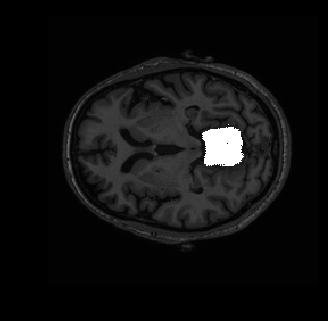

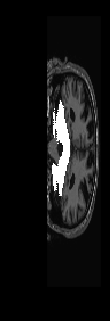

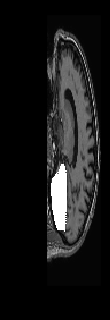

In [16]:
globals()['im'] = None
globals()['canvas'] = None
globals()['z_index'] = 0

window = tk.Tk()

window.title(f"{app_title}")

menubar = tk.Menu(window)
filemenu = tk.Menu(menubar, tearoff=0)
filemenu.add_command(label="Open",command=open_file)
filemenu.add_command(label="Save")
filemenu.add_command(label="Exit")

maskmenu = tk.Menu(menubar, tearoff=0)
maskmenu.add_command(label="Add mask", command=open_mask_file)

menubar.add_cascade(label="File", menu=filemenu)
menubar.add_cascade(label="Mask", menu=maskmenu)

window.config(menu=menubar)



window.rowconfigure(0, minsize=600, weight=1)
window.columnconfigure(1, minsize=600, weight=1)


#window.resizable(width="false", height="false")

window.minsize(width=800, height=600)
#window.maxsize(width=800, height=600)


# Central view. Here we'll display images, when it comes to a imgview ;)
#txt_edit = tk.Text(window)



central_frame_container = tk.Frame(window)
central_frame = tk.Frame(central_frame_container)
# Loading sample image here
#fig = Figure(figsize=(5, 4), dpi=100)
#img_view = FigureCanvasTkAgg(fig, master=frame)


left_buttons = tk.Frame(window, relief=tk.RIDGE, borderwidth=2)
btn_open = tk.Button(left_buttons, text="Open", command=open_file)
btn_open_mask = tk.Button(left_buttons, text="Open mask", command=open_mask_file)
btn_save = tk.Button(left_buttons, text="Save As...", command=save_file)


btn_open.grid(row=0, column=0, sticky="ew", padx=5, pady=5)
btn_open_mask.grid(row=1, column=0, sticky="ew", padx=5)
btn_save.grid(row=2, column=0, sticky="ew", padx=5)

right_buttons = tk.Frame(window, relief=tk.RIDGE, borderwidth=2)

right_buttons.columnconfigure(0, minsize=200)
left_buttons.columnconfigure(0, minsize=200)


btn_exit = tk.Button(right_buttons, text="Exit", command=quit)

btn_exit.grid(row=0, column=0, sticky="ew", padx=5, pady=5)


left_buttons.grid(row=0, column=0, sticky="ns")
central_frame_container.grid(row=0, column=1, sticky="nwse")
central_frame.grid(row=0, column=0, sticky="nwse")
right_buttons.grid(row=0, column=2, sticky="ns")

central_frame_container.rowconfigure(0, weight=1)
central_frame_container.columnconfigure(0, weight=1)

#central_frame_container.rowconfigure(1, weight=1)


central_frame.rowconfigure(0, weight=1)
central_frame.columnconfigure(0, weight=1)

central_frame.rowconfigure(1, weight=1)
central_frame.columnconfigure(1, weight=1)


frame = tk.Frame(central_frame, relief=tk.RIDGE, borderwidth=2)
frame2 = tk.Frame(central_frame, relief=tk.RIDGE, borderwidth=2)
frame3 = tk.Frame(central_frame, relief=tk.RIDGE, borderwidth=2)
#bottom_frame = tk.Frame(central_frame_container)




#bottom_frame.grid(row=1, column= 0, sticky="nswe")
frame.grid(row=0, column=0, sticky="nwes")
frame2.grid(row=0, column=1, sticky="nwes")
frame3.grid(row=1, column=0, sticky="nwse")

#frame.bind("<MouseWheel>", on_mousewheel,  add='+')
frame.bind("<Enter>", register_axial_mousewheel)
frame.bind("<Leave>", unregister_all_mousewheel)

frame2.bind("<Enter>", register_coronal_mousewheel)
frame2.bind("<Leave>", unregister_all_mousewheel)

frame3.bind("<Enter>", register_sagital_mousewheel)
frame3.bind("<Leave>", unregister_all_mousewheel)
           

#command_line = tk.Text(bottom_frame, relief=tk.RIDGE, borderwidth=2)
#command_line.grid(row=0, column=0, sticky="ns")



#frame_coronal_view = tk.Frame(bottom_buttons, relief=tk.RIDGE, borderwidth=2)
#frame_coronal_view.grid(row=0, column=0, sticky="ns")
#frame_coronal_view.bind('<Button-1>', set_coronal_view, add='+')
#frame_coronal_view.bind('<Enter>', register_coronal)
#frame_coronal_view.bind('<Leave>', unregister)


#frame_sagital_view = tk.Frame(bottom_buttons, relief=tk.RIDGE, borderwidth=2)
#frame_sagital_view.grid(row=0, column=1, sticky="ns")
#frame_sagital_view.bind('<Button-1>', set_sagital_view, add='+')
#frame_sagital_view.bind('<Enter>', register_sagital)
#frame_sagital_view.bind('<Leave>', unregister)

#frame_axial_view = tk.Frame(bottom_buttons, relief=tk.RIDGE, borderwidth=2)
#frame_axial_view.grid(row=0, column=2, sticky="ns")
#frame_axial_view.bind('<Button-1>', set_axial_view, add='+')
#frame_axial_view.bind('<Enter>', register_axial)
#rame_axial_view.bind('<Leave>', unregister)




window.mainloop()

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


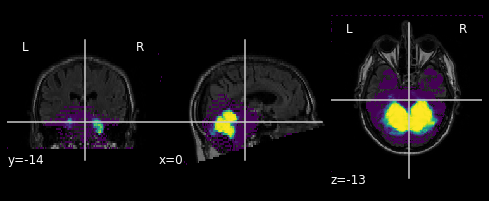

In [18]:
xx = plot_anat(img)
xx.add_overlay(mask)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


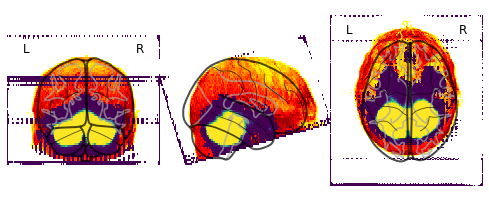

In [34]:
from nilearn.plotting import plot_glass_brain
xxx = plot_glass_brain(img)
xxx.add_overlay(mask)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


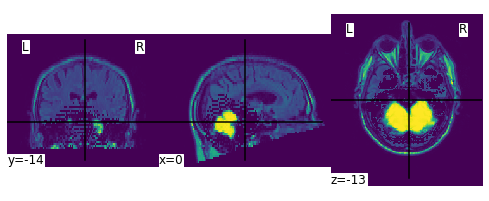

In [20]:
from nilearn.plotting import plot_img
xxxx = plot_img(img)
xxxx.add_overlay(mask)

In [ ]:
from nilearn.plotting import plot_roi
xxxxx = plot_roi(img)
xxxxx.add_overlay(mask)

In [ ]:
x = plot_anat(img)
x.add_overlay(mask)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


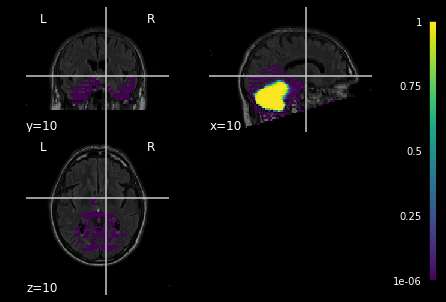

In [22]:
fg = plt.figure(10, facecolor='black', edgecolor='white')
res = plot_anat(img, display_mode='tiled', cut_coords=(10, 10, 10), figure=10)
res.add_overlay(mask, colorbar=True)

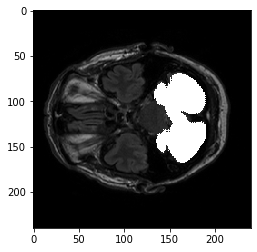

In [84]:
img.get_fdata()[mask.get_fdata() >= 0.5] = 1000
#img.get_fdata()[mask.get_fdata() < 0.5] = 1000

plt.imshow(img.get_fdata()[:,:,10], cmap='gray')

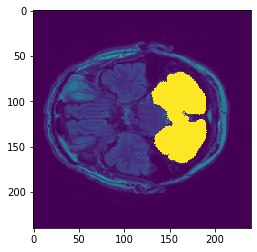

In [32]:
plt.imshow(img.get_fdata()[:,:,11])

In [44]:
print(img.affine)
M = img.affine[:3, :3]
abc = img.affine[:3, 3]

def f(i, j, k):
    """ Return X, Y, Z coordinates for i, j, k """
    return M.dot([i, j, k]) + abc

epi_vox_center = (np.array(img.shape) - 1) / 2.
print(f(epi_vox_center[0], epi_vox_center[1], epi_vox_center[2]))

from nibabel.affines import apply_affine
print(apply_affine(img.affine, epi_vox_center))



[[ -0.95833302   0.           0.         110.89199829]
 [  0.          -0.91877592  -0.85302001 115.17299652]
 [  0.          -0.27249241   2.87616897 -15.59920025]
 [  0.           0.           0.           1.        ]]
[ -3.62879705 -14.66669574  19.42792761]
[ -3.62879705 -14.66669574  19.42792761]


In [48]:
scaling_affine = np.array([[3, 0, 0, 0], [0, 3, 0, 0], [0, 0, 3, 0], [0, 0, 0, 1]])
one_vox_axis_0 = [1, 0, 0]
print(apply_affine(scaling_affine, one_vox_axis_0))

cos_gamma = np.cos(0.3)
sin_gamma = np.sin(0.3)
rotation_affine = np.array([[1, 0, 0, 0], [0, cos_gamma, -sin_gamma, 0], [0, sin_gamma, cos_gamma, 0], [0, 0, 0, 1]])
affine_so_far = rotation_affine.dot(scaling_affine)
print(affine_so_far)
translation_affine = np.array([[1, 0, 0, -78], [0, 1, 0, -76], [0, 0, 1, -64], [0, 0, 0, 1]])
whole_affine = translation_affine.dot(affine_so_far)
print(whole_affine)

[3 0 0]
[[ 3.          0.          0.          0.        ]
 [ 0.          2.86600947 -0.88656062  0.        ]
 [ 0.          0.88656062  2.86600947  0.        ]
 [ 0.          0.          0.          1.        ]]
[[  3.           0.           0.         -78.        ]
 [  0.           2.86600947  -0.88656062 -76.        ]
 [  0.           0.88656062   2.86600947 -64.        ]
 [  0.           0.           0.           1.        ]]


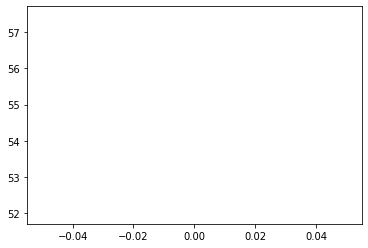

In [49]:
plt.plot(np.mean(img.get_fdata(),axis=(0,1,2)))